In [1]:

import numpy as np 
import pickle
from conf_ope_rl import * 


In C:\Users\kvnta\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\kvnta\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The savefig.frameon rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\kvnta\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The pgf.debug rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.
In C:\Users\kvnta\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.level rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.
In C:\Users\kvnta\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The verbose.fileo rcparam was deprecated in Matplotlib 3.1 and will be removed in 3.3.


# Generate gridworld

In [2]:

#'up':2, 'down':3, 'left':0, 'right':1
# indexing is j,i; j increasing goes downwards 
# (0,0), (0,1), (0,2)
# (1,0), (1,1), (1,2)... 
# (2,0), (2,1), (2,2) 

# The bad states are
# (0,0), (0,1) X, (0,2) X
# (1,0), (1,1),  (1,2) X... 
# (2,0) X, (2,1), (2,2) 



P_u0, R_u0 = grid_world_example(grid_size=(3, 3))
[nA, nS,nS] = P_u0.shape
nU = 2
# make reward array
bad_Rwd = -0.3
living_Rwd = -0.1
arr = [living_Rwd, bad_Rwd, bad_Rwd, 
      living_Rwd  , living_Rwd, bad_Rwd, 
       bad_Rwd, bad_Rwd, 1]
R_u0_vec = np.asarray(arr)
R_u0 = np.zeros([nS,nA]); 
for a in range(nA): 
    R_u0[:,a] = R_u0_vec

# repeat for all actions

P_u1, R_u1 = westward_wind_grid_world_example(grid_size=(3, 3))

P_u1
print(R_u1.shape)

(2, 2)
(2, 2)
(9, 4)


In [3]:
# build S,U transition matrix 
#nU = 2
#nS = 3*3
P_su = np.zeros([nS*nU, nA ,nS*nU])
P_su_mdptoolbox = np.zeros([nA , nS*nU, nS*nU])
Ps = [P_u0, P_u1]
for a_ind in range(nA): 
    for i_s in range(nS): 
        for i_sprime in range(nS): 
            for i_u in range(nU): 
                P_su[ i_s*nU + i_u,a_ind, i_sprime*nU:(i_sprime*nU+nU)] = Ps[i_u][a_ind, i_s, i_sprime]/nU
                P_su_mdptoolbox[ a_ind, i_s*nU + i_u, i_sprime*nU:(i_sprime*nU+nU)] = Ps[i_u][a_ind, i_s, i_sprime]/nU

# print [(P_su[:,a,:].sum(axis=1)) for a in range(nA)]
# print [(P_su_mdptoolbox[a,:,:].sum(axis=1)) for a in range(nA)]

In [4]:

import mdptoolbox.example
# P, R = mdptoolbox.example.forest()
vi = mdptoolbox.mdp.ValueIteration(P_u0, R_u0, 0.99)
vi.run()
pi_opt_s = vi.policy # result is (0, 0, 0)
pi_opt_s
pi_opt_s_ = np.zeros([nA, nS*nU])
for s in range(nS): 
    pi_opt_s_[pi_opt_s[s],s*nU] = 1
    pi_opt_s_[pi_opt_s[s],s*nU+1 ] = 1
# print pi_opt_s
uniform_pi = np.ones([nA, nS*nU])*1.0 / (nA)
# print uniform_pi
# print pi_opt_s_

# print np.round(pi_opt_s_,2)

In [5]:
# Reward matrix
R_u0

array([[-0.1, -0.1, -0.1, -0.1],
       [-0.3, -0.3, -0.3, -0.3],
       [-0.3, -0.3, -0.3, -0.3],
       [-0.1, -0.1, -0.1, -0.1],
       [-0.1, -0.1, -0.1, -0.1],
       [-0.3, -0.3, -0.3, -0.3],
       [-0.3, -0.3, -0.3, -0.3],
       [-0.3, -0.3, -0.3, -0.3],
       [ 1. ,  1. ,  1. ,  1. ]])

## Compute optimal full-information policy

In [6]:
P_u1.shape

(4, 9, 9)

In [7]:
vi = mdptoolbox.mdp.ValueIteration(P_u0*0.5+0.5*P_u1, R_u0, 0.99)
vi.run()
pi_opt_smarg = vi.policy # result is (0, 0, 0)
pi_opt_smarg_ = np.zeros([nA, nS*nU])
for s in range(nS): 
    pi_opt_smarg_[pi_opt_smarg[s],s*nU] = 1
    pi_opt_smarg_[pi_opt_smarg[s],s*nU+1 ] = 1


In [8]:
P_su_mdptoolbox.shape

(4, 18, 18)

In [9]:
R_su = np.repeat(R_u0, 2 ).reshape([nS*nU, nA])
vi = mdptoolbox.mdp.ValueIteration(P_su_mdptoolbox, R_su, 0.99)
vi.run()
pi_opt_su = vi.policy # result is (0, 0, 0)
pi_opt_su
pi_opt_su_ = np.zeros([nA, nS*nU])
for su in range(nS*nU): 
    pi_opt_su_[pi_opt_su[su],su] = 1


#### Rename some quantities

In [10]:
# pi_opt_s_ optimal on state space s 
# pi_opt_su optimal on state space, unobserved state space U 

# Assume Suboptimal behavior policy 
mu_mix_behavior = 0.15
Pi = mu_mix_behavior*pi_opt_su_ + (1-mu_mix_behavior)*uniform_pi
nS = pi_opt_su_.shape[1] 
P = np.zeros([nS, nA, nS ])
# print p_e_su
P = P_su
state_dist = np.ones(nS)/nS
n = 40000
# get evaluation policy 

# Generate data

In [21]:
from numba import jit
@jit(nopython=True, cache=True)
def simulate_rollouts( nS, nA, P, Pi, state_dist, n ):
    stateChangeHist = np.zeros((nS,nS))
    s_a_sprime = np.zeros((nS,nA,nS))
    currentState=0; 
    s0 = np.zeros((1,nS))
    print(state_dist)
    #s0_ = np.random.choice(list(range(nS)), p = state_dist)
    s0_ = np.array(list(range(nS)))[np.searchsorted(np.cumsum(state_dist), np.random.rand(1))]
    for i in s0_:
        s0[0, i] = 0
    #s0[0,s0_] = 1 
    stateHist=s0
    #dfStateHist=pd.DataFrame(s0)
    distr_hist = np.zeros((n,nS))
    a_s = np.zeros(n)

    for x in range(n):
        a = np.arange(0, nA)[np.searchsorted(np.cumsum(Pi[:,currentState]), np.random.rand(1))][0]
        #a = np.random.choice(np.arange(0, nA), p=Pi[:,currentState])
        a_s[x] = a
        #currentRow=np.ma.masked_values(( P[currentState, a, :] ) , 0.0)
        currentProbs = np.zeros(P.shape[2])
        for i in range(P.shape[2]):
            currentProbs[i] = P[currentState, a, i]
        currentRow = np.zeros(0)
        for i in currentProbs:
            if i != 0.0:
                currentRow = np.append(currentRow, i)
        #currentRow = P[currentState, a, :][P[currentState, a, :] != 0.0]
        #nextState=np.random.choice(np.arange(0, nS), p=currentRow)
        nextState = np.arange(0, nS)[np.searchsorted(np.cumsum(currentRow), np.random.rand(1))][0]
        # Keep track of state changes
        stateChangeHist[currentState,nextState]+=1
        # Keep track of the state vector itself
        state=np.zeros((1,nS)) #np.array([[0,0,0,0]])
        state[0,nextState]=1.0
        # Keep track of state history
        stateHist=np.append(stateHist,state,axis=0)
        # get s,a,s' distribution 
        s_a_sprime[currentState, a, nextState] += 1
        currentState=nextState
        # calculate the actual distribution over the 3 states so far
        totals=np.sum(stateHist,axis=0)
        gt=np.sum(totals)
        distrib=totals*1.0/gt
        distrib=np.reshape(distrib,(1,nS))
        for i in range(nS):
            distr_hist[x, i] = distrib[0, i]

    return stateChangeHist, stateHist, a_s, s_a_sprime, distrib, distr_hist
#simulate_rollouts(nS, nA, P, Pi, state_dist, n )

In [14]:
tight = False
nSmarg = nS / nU
stateChangeHist, stateHist, a_s, s_a_sprime, p_infty_b_su, distr_hist =  simulate_rollouts( 
    nS, nA, P, Pi, state_dist, n )
p_infty_b_s = (reshape_byxrow(p_infty_b_su.T, nU).T).flatten()
p_infty_b_su = p_infty_b_su.flatten()


[0.05555556 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556
 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556
 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556]


In [15]:
print('stationary state occupancy s',  p_infty_b_s)
print(('stationary distn on s,u: ', p_infty_b_su))

print(sum(p_infty_b_su))

stationary state occupancy s [0.711225 0.15265  0.136125 0.       0.       0.       0.       0.
 0.      ]
('stationary distn on s,u: ', array([0.355875, 0.35535 , 0.075525, 0.077125, 0.06885 , 0.067275,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      ,
       0.      , 0.      , 0.      , 0.      , 0.      , 0.      ]))
0.9999999999999999


## Change evaluation policy 

In [16]:
# Closer to optimal evaluation policy
mumix = 0 # mixing coef for policies
p_e_su = pi_opt_su_*mumix + uniform_pi*(1-mumix)
p_e_s = reshape_byxrow(p_e_su.T,nU).T / nU 
print(p_e_su)


[[0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
  0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
  0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
  0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25
  0.25 0.25 0.25 0.25]]


In [17]:
# process history 
print(np.isclose(sum(p_infty_b_s),1))
[ p_a1_su, joint_s_a_sprime, s_a_giv_sprime ] = get_auxiliary_info_from_traj(stateChangeHist, 
                                        stateHist, a_s, s_a_sprime, p_infty_b_su, distr_hist, nA,nS)
# agg history and process
[aggStateHist, p_a1_s, p_e_s, agg_s_a_sprime, joint_s_a_sprime_agg, s_a_giv_sprime_agg] = agg_history(
            stateHist, s_a_sprime, p_infty_b_s, a_s, p_e_su, int(nA), int(nS), int(nSmarg), int(nU))
# # Simulate from evaluation policy: 
# [ stateChangeHist_e, stateHist_e, a_s_e, s_a_sprime_e, p_infty_e, distr_hist_e ] =  simulate_rollouts( 
#     nS, nA, P, p_e_su, state_dist, n )

print('pi_e_s', p_e_s)

True


C:\Users\kvnta\OneDrive\Documents\UMich\Stats\Research\rl-thesis\confoundingExperiments\conf_ope_rl.py:94: RuntimeWarning: invalid value encountered in true_divide
  p_a1_su[a,:] = [sum( (a_s==a) & (stateHist[:-1,s]==1) ) / sum(stateHist[:-1,s]) for s in range(nS)]
C:\Users\kvnta\OneDrive\Documents\UMich\Stats\Research\rl-thesis\confoundingExperiments\conf_ope_rl.py:111: RuntimeWarning: invalid value encountered in true_divide
  s_a_giv_sprime = joint_s_a_sprime / distrib


conditional not well behaved for s=6
conditional not well behaved for s=7
conditional not well behaved for s=8
conditional not well behaved for s=9
conditional not well behaved for s=10
conditional not well behaved for s=11
conditional not well behaved for s=12
conditional not well behaved for s=13
conditional not well behaved for s=14
conditional not well behaved for s=15
conditional not well behaved for s=16
conditional not well behaved for s=17
conditional not well behaved for s=3
conditional not well behaved for s=4
conditional not well behaved for s=5
conditional not well behaved for s=6
conditional not well behaved for s=7
conditional not well behaved for s=8
pi_e_s [[0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25]
 [0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25 0.25]]


In [ ]:
# intermediate data save
# 
# data = {'p_a1_su': p_a1_su, 'joint_s_a_sprime': joint_s_a_sprime, 's_a_giv_sprime':s_a_giv_sprime,'aggStateHist':aggStateHist,'p_a1_s':p_a1_s,'p_e_s':p_e_s,'agg_s_a_sprime':agg_s_a_sprime,'joint_s_a_sprime_agg':joint_s_a_sprime_agg,'s_a_giv_sprime_agg':s_a_giv_sprime_agg   } 
# pickle.dump(data, open('data-0.15behaviormixture.p','wb'))

## Simulate to get real policy evaluation value

In [ ]:
# [ stateChangeHist, stateHist, a_s, s_a_sprime, p_infty_b_su_long, distr_hist ] =  simulate_rollouts( 
#     nS, nA, P, Pi, state_dist, 10000 )
# [ stateChangeHist_e, stateHist_e, a_s, s_a_sprime_e, p_infty_e_long, distr_hist_e ] =  simulate_rollouts( 
#     nS, nA, P, p_e_su, state_dist, 10000 )

# print p_infty_b_su_long
# print p_infty_e_long
# w_su_oracle_norm = p_infty_b_su_long/p_infty_e_long
# w_s_oracle_norm = reshape_byxrow(w_su_oracle_norm.T,nU).T.flatten()
# w_s_oracle_normalized = w_s_oracle_norm / np.dot(w_s_oracle_norm, p_infty_b_s)



In [ ]:
# pickle.dump({'min_bnds':min_bnds, 'max_bnds':max_bnds}, open('bnds-pi-smarg.p','w'))

# Generate figure

In [18]:

tight = True; quiet = True; sense_min = False
# fix parameters
ngams = 25
logGams_full = np.linspace(0.1, 1.7, ngams)
phi = R_u0_vec
nmus = 5
# set evaluation policy
PI_E = pi_opt_s_



min_bnds = [[None] * ngams for m_ in range(nmus)];
max_bnds = [[None] * ngams for m_ in range(nmus)];
gamma = 1
mus = np.linspace(0.3,0.95,nmus)

def get_bnds(est_Q,LogGamma):
    ''' Odds ratio with respect to 1-a 
    '''
    n = len(est_Q)
    p_hi = np.multiply(np.exp(LogGamma), est_Q ) / (np.ones(n) - est_Q + np.multiply(np.exp(LogGamma), est_Q ))
    p_lo = np.multiply(np.exp(-LogGamma), est_Q ) / (np.ones(n) - est_Q + np.multiply(np.exp(-LogGamma), est_Q ))
    print(p_lo < p_hi)
    #assert (p_lo < p_hi).all()
    a_bnd = 1/p_hi;
    b_bnd = 1/p_lo
    return [ a_bnd, b_bnd ]
def get_bnds_as( p_a1_s, LogGamma ):
    a_bnd = np.zeros(p_a1_s.shape); b_bnd = np.zeros(p_a1_s.shape)
    for a in range(p_a1_s.shape[0]):
        [a_bnd_, b_bnd_] = get_bnds(p_a1_s[a,:],LogGamma)
        a_bnd[a,:] = a_bnd_; b_bnd[a,:] = b_bnd_
    return [a_bnd, b_bnd]
print(nA, nS)
nA = int(nA)
nS = int(nS)
for m_ in range(nmus): 
    p_e_su = PI_E*mus[m_] + uniform_pi*(1-mus[m_])
    p_e_s = reshape_byxrow(p_e_su.T,nU).T / nU 
    for ind,logGam in enumerate(logGams_full): 
        sense_min = False
        [a_bnd, b_bnd] = get_bnds_as( np.nan_to_num(p_a1_s, 0), logGam )
        [objVal, w_, m] = primal_opt_outer_L1_test_function_joint_distn(gamma, phi, a_bnd,b_bnd, joint_s_a_sprime_agg, p_infty_b_s, p_e_s, int(nSmarg), int(nA), tight, sense_min, quiet)
        print(objVal)
        print(w_)
        min_bnds[m_][ind] = objVal#; w_min_bnds[ind] = w_; 
        sense_min = True
        [objVal, w_, m] = primal_opt_outer_L1_test_function_joint_distn(gamma, phi, a_bnd,b_bnd, joint_s_a_sprime_agg, p_infty_b_s, p_e_s, int(nSmarg), int(nA), tight, sense_min, quiet)
        print(objVal)
        max_bnds[m_][ind] = objVal#; w_max_bnds[ind] = w_; 
        print(w_)  



4 18
[ True  True  True False False False False False False]
[ True  True  True False False False False False False]
[ True  True  True False False False False False False]
[ True  True  True False False False False False False]
9
Academic license - for non-commercial use only - expires 2022-09-24
Using license file C:\Users\kvnta\gurobi.lic
None
None
9


C:\Users\kvnta\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\kvnta\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in true_divide


None
None
[ True  True  True False False False False False False]
[ True  True  True False False False False False False]
[ True  True  True False False False False False False]
[ True  True  True False False False False False False]
9
None
None
9
None
None
[ True  True  True False False False False False False]
[ True  True  True False False False False False False]
[ True  True  True False False False False False False]
[ True  True  True False False False False False False]
9
-0.16927557044196873
[0.9190089603011093, 0.9679829170727089, 1.4590652702934397, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
9
-0.171377373262739
[0.904233025675848, 0.9989699876841732, 1.501517705738887, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[ True  True  True False False False False False False]
[ True  True  True False False False False False False]
[ True  True  True False False False False False False]
[ True  True  True False False False False False False]
9
-0.16907601691449398
[0.9204118463601958, 0.9650992629879129, 1.4549

## Get true evaluation policy values (by simulation) 

In [19]:
w_s_normalized_ = [None]* nmus
vals = [None] * nmus

for m_ in range(nmus): 

    p_e_su = PI_E*mus[m_] + uniform_pi*(1-mus[m_])
    [ stateChangeHist_e, stateHist_e, a_s, s_a_sprime_e, p_infty_e_long, distr_hist_e ] =  simulate_rollouts( 
        nS, nA, P, p_e_su, state_dist, 20000 )

    w_su_oracle_norm = p_infty_b_su/p_infty_e_long

    w_s_oracle_norm = reshape_byxrow(w_su_oracle_norm.T,nU).T.flatten()
    w_s_oracle_normalized = w_s_oracle_norm / np.dot(w_s_oracle_norm, p_infty_b_s)
    w_s_normalized_[m_] = w_s_oracle_normalized
    # stationary evaluation occupancy
    vals[m_] = np.dot(np.ones(len(phi)), phi*reshape_byxrow(p_infty_e_long.T,nU).T.flatten())


print(vals)


[0.05555556 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556
 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556
 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556]
[0.05555556 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556
 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556
 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556]
[0.05555556 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556
 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556
 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556]
[0.05555556 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556
 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556
 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556]
[0.05555556 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556
 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556
 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556 0.

C:\Users\kvnta\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in true_divide
  # Remove the CWD from sys.path while we load stuff.


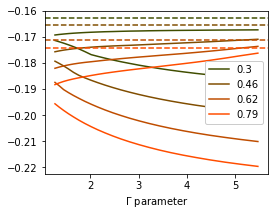

In [23]:
import pickle
plt.figure(figsize=(4.,3))
gams___ = np.exp(logGams_full)
scenario_title = 'mixture-pi-opt-s-ka-ctrl-var'
# load from output
# vals_ = pickle.load( open('policy_smarg_-vals.p', 'r') )
# vals = vals_['vals']

for m_ in range(nmus-1): 
    plt.plot(np.exp(logGams_full),min_bnds[m_],color=((m_+1)*1.0/(nmus-1), 0.3,0),label=np.round(mus[m_],2)) #if m_%2 ==0 else None ) 
    plt.plot(np.exp(logGams_full),max_bnds[m_],color=((m_+1)*1.0/(nmus-1), 0.3,0))

    plt.axhline(vals[m_], linestyle='--',color=((m_+1)*1.0/(nmus-1), 0.3,0 ))
plt.xlabel(r'$\Gamma$ parameter')
plt.legend(framealpha=1)
#plt.savefig("3-3gridworld-"+scenario_title+".pdf",bbox_inches = 'tight')
# optional output storage 
# pickle.dump({'min_bnds':min_bnds, 'max_bnds':max_bnds}, open('bnds-'+scenario_title+'.p','w'))
# pickle.dump( {'pib':p_a1_su, 'pie-mix-comp':p_e_su}, open(scenario_title+'-params.p', 'w') )

Figure 6 is generated by changing PI_E to pi_opt_smarg_